## Prediction using Logistic Regression

In [1]:
## import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
import matplotlib.pyplot as plt

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


#### Load dataset

In [2]:
from sklearn.metrics import roc_curve, auc
url = "Dataset/Test-Data-10.csv"
df = pd.read_csv(url)
include = [ 'Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  # Except the year, all the features are taken 
df1 = df[include]
print(df1.head(20))
print(df1.describe())

    Age Gender    Religon        Race  \
0    30      F      Islam      Muslim   
1    91      F      Islam      Muslim   
2    85      M      Islam      Muslim   
3    87      M  Christian  Sinhalese    
4    59      M      Islam      Muslim   
5    31      M      Other  Sinhalese    
6    75      M  Christian      Burger   
7    47      M   Buddhist  Sinhalese    
8    58      M  Christian      Burger   
9    36      M      Hindu       Tamil   
10   87      M   Buddhist  Sinhalese    
11   73      M  Christian      Burger   
12   44      M   Buddhist  Sinhalese    
13   62      M   Buddhist  Sinhalese    
14   21      M      Hindu       Tamil   
15   70      M   Buddhist  Sinhalese    
16   68      M      Hindu       Tamil   
17   43      F   Buddhist  Sinhalese    
18   16      M      Islam      Muslim   
19   35      M      Hindu       Tamil   

                                 Nature Of Occupation Civil Status  \
0   Administrative Executive Managerial & related ...    Unmarried  

#### Replacing unwanted labels with a unique label

In [3]:
df['Reason'].replace(['Asthma', "Alzheimer's disease", 'Diabetes',
              'Cirrhosis', 'Ischemic heart disease', 
              'Road Accident','Chronic kidney disease'],
             ['Natural Death','Natural Death','Natural Death','Natural Death',
              'Natural Death','Natural Death','Natural Death'], inplace = True)
df['Reason'].replace(['Stroke/Chronic diseases & Physical disabilities'],
             ['Chronic diseases & Physical disabilities'], inplace = True)
df2 = df[include]

#### Data Preprocessing

In [4]:
categoricals = []
for col, col_type in df1.dtypes.iteritems():
     if col_type == 'O':
          categoricals.append(col)
     else:
          df1[col].fillna(0, inplace=True)

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### LabelEncoder

In [5]:
category_col =['Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    df1[col] = labelEncoder.fit_transform(df1[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(df1.head(20))

for x, y in mapping_dict.items():
  print(x, y)

    Age  Gender  Religon  Race  Nature Of Occupation  Civil Status  \
0    30       0        3     1                     0             2   
1    91       0        3     1                     8             1   
2    85       1        3     1                     9             1   
3    87       1        1     3                    12             1   
4    59       1        3     1                     4             2   
5    31       1        4     3                     1             2   
6    75       1        1     0                     2             1   
7    47       1        0     3                    12             1   
8    58       1        1     0                     2             2   
9    36       1        2     4                     2             1   
10   87       1        0     3                    12             1   
11   73       1        1     0                     3             1   
12   44       1        0     3                     1             1   
13   62       1     

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Replacing unwanted labels with a unique label

In [6]:
df.replace(['Asthma', "Alzheimer's disease", 'Diabetes',
              'Cirrhosis', 'Ischemic heart disease', 
              'Road Accident','Chronic kidney disease'],
             ['Natural Death','Natural Death','Natural Death','Natural Death',
              'Natural Death','Natural Death','Natural Death'], inplace = True)
df.replace(['Stroke/Chronic diseases & Physical disabilities'],
             ['Chronic diseases & Physical disabilities'], inplace = True)

**Analysing Data**


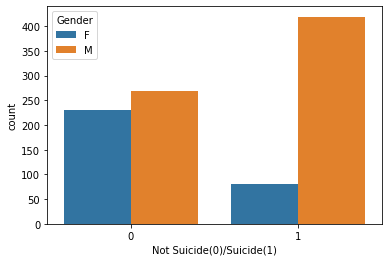

In [7]:
#Comparing Gender
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Gender",data=df)


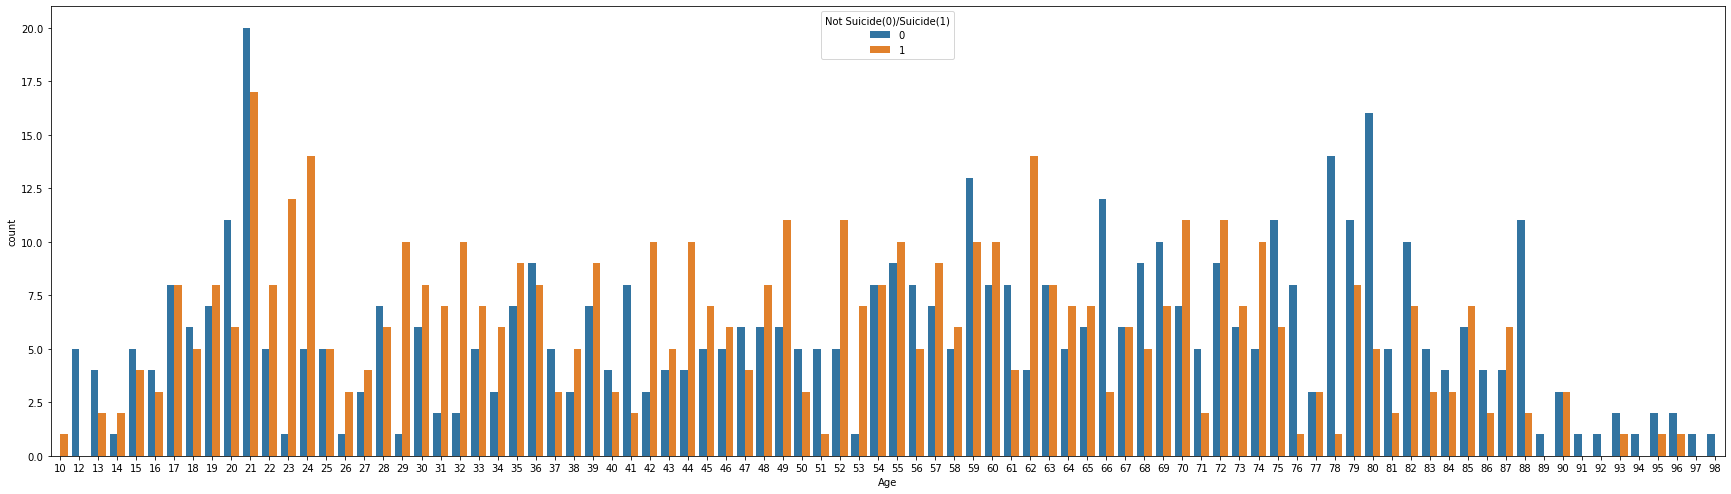

In [8]:
#Comparing Age
a4_dims = (30, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x="Age",hue="Not Suicide(0)/Suicide(1)",data=df, ax=ax)
#plt.savefig('Age.svg')

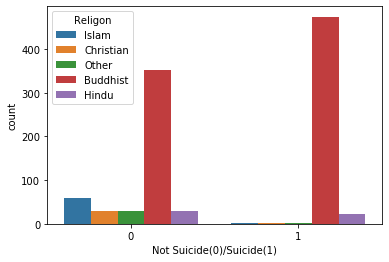

In [9]:
#Comparing Religion
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Religon",data=df)


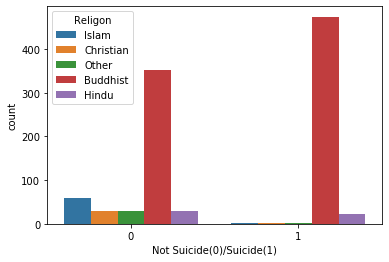

In [10]:
#Comparing Religion
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Religon",data=df)


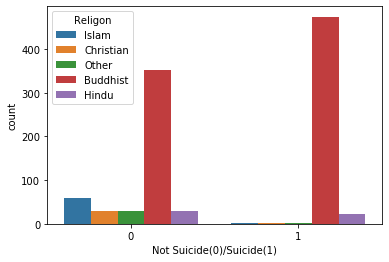

In [11]:
#Comparing Religion
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Religon",data=df)


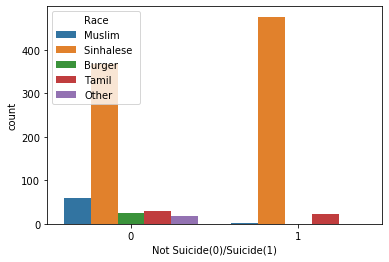

In [12]:
#Comparing Race
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Race",data=df)


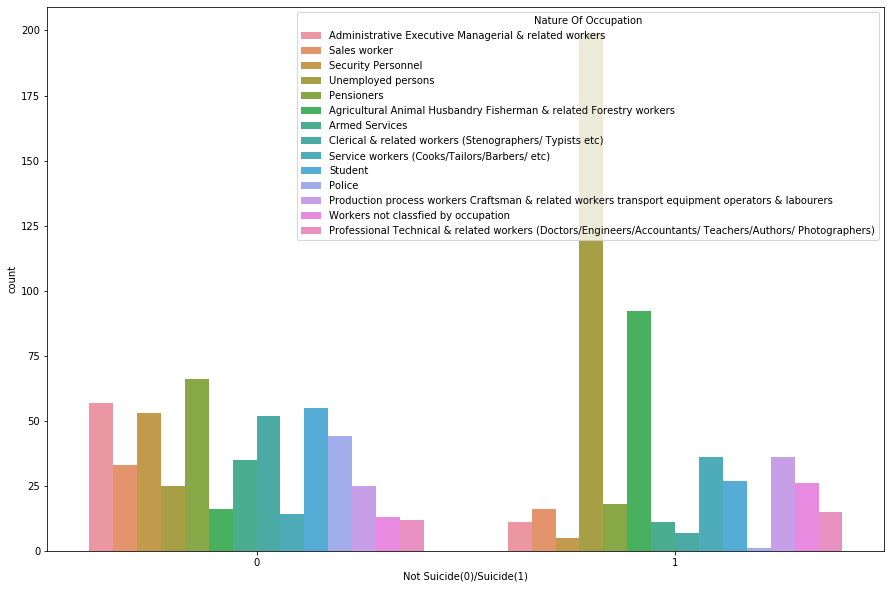

In [13]:
#Comparing Nature Of Occupation
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Nature Of Occupation",data=df)
#plt.savefig('Dataset/NoO.svg')

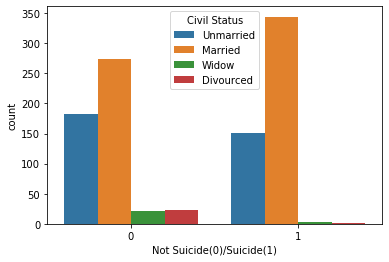

In [14]:
#Comparing Civil Status
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Civil Status",data=df)


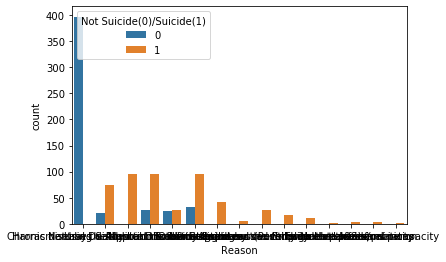

In [15]:
#Comparing Reason
sns.countplot(x="Reason",hue="Not Suicide(0)/Suicide(1)",data=df)

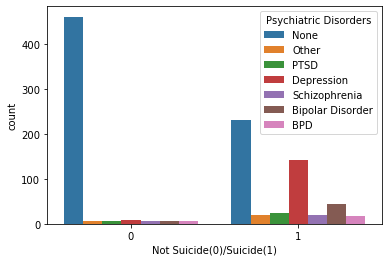

In [16]:
#Comparing Psychiatric Disorders
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Psychiatric Disorders",data=df)


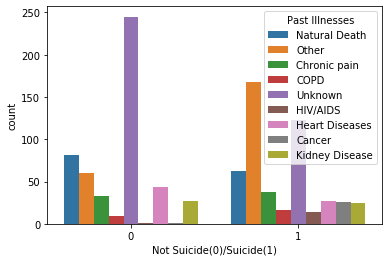

In [17]:
#Comparing Past Illnesses
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Past Illnesses",data=df)




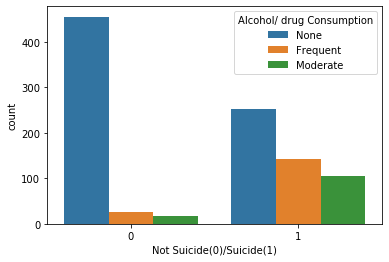

In [18]:
#Comparing Alcohol/ drug Consumption
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Alcohol/ drug Consumption",data=df)


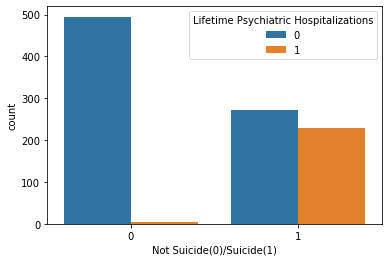

In [19]:
#Comparing Lifetime Psychiatric Hospitalizations
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Lifetime Psychiatric Hospitalizations",data=df)


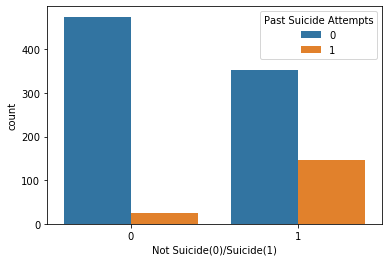

In [20]:
#Comparing Past Suicide Attempts
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Past Suicide Attempts",data=df)


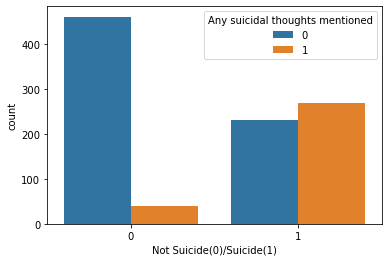

In [21]:
#Comparing Any suicidal thoughts mentioned
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Any suicidal thoughts mentioned",data=df)


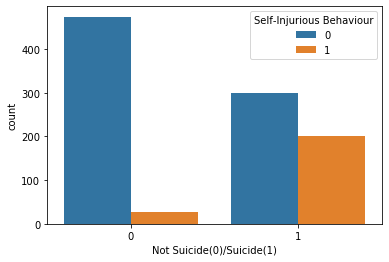

In [22]:
#Comparing Self-Injurious Behaviour
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Self-Injurious Behaviour",data=df)


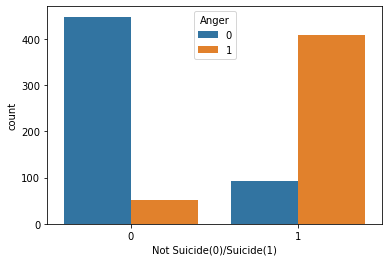

In [23]:
#Comparing Anger
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Anger",data=df)


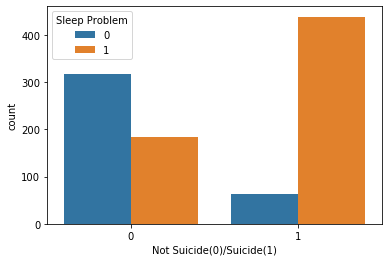

In [24]:
#Comparing Sleep Problem
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Sleep Problem",data=df)

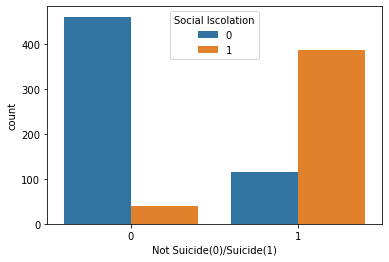

In [25]:
#Comparing Social Iscolation
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Social Iscolation",data=df)

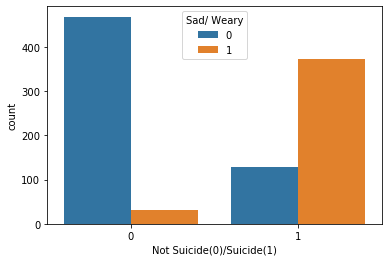

In [26]:
#Comparing Sad/ Weary
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Sad/ Weary",data=df)


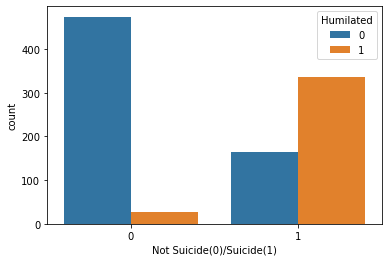

In [27]:

#Comparing Humilated
sns.countplot(x="Not Suicide(0)/Suicide(1)",hue="Humilated",data=df)
#plt.savefig('Dataset/Humilated.svg')

In [28]:
feature_cols = ['Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated']
X = df1[feature_cols] # Features
y = df1['Not Suicide(0)/Suicide(1)']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
dependent_variable = 'Not Suicide(0)/Suicide(1)'

In [30]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

c:\users\dinis\pycharmprojects\suicide-risk-predictor\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy: 0.9666666666666667
Precision: 0.9612903225806452
Recall: 0.9738562091503268


#### Model created

In [32]:
# import pickle
# #creating and training a model
# #serializing our model to a file called model.pkl
# pickle.dump(logreg, open("model.pkl","wb"))
# print("Model was created!")


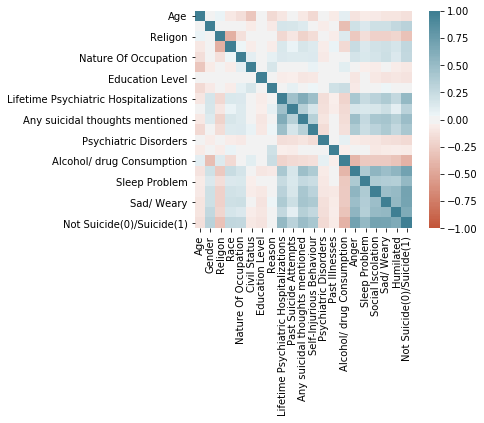

In [33]:
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

[0.         0.04081633 1.        ]
[0.         0.97385621 1.        ]
[2 1 0]
0.9665199413098572


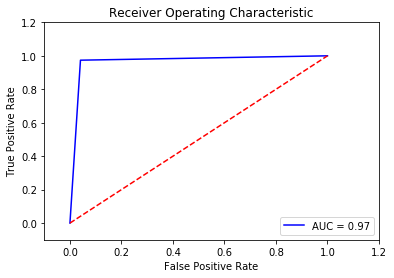

In [34]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

